In [27]:
import cv2
import matplotlib.pyplot as plt
import imutils
from img_processing import find_Face, get_Contour, get_Sckeleton, generate_Mask, get_Measurement, pose_detect
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder, StandardScaler
import pandas as pd

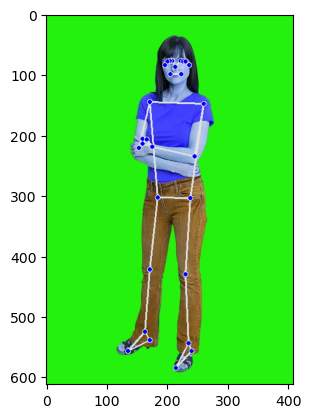

In [28]:
img = cv2.imread('./images/test-1.jpg')
res_land, res_anno = pose_detect(img)
plt.imshow(res_anno)
# print(res_land)

estimation height :  165.0
estimation width :  47.7
estimation shoulder-width :  49.6
estimation hip-width :  30.1


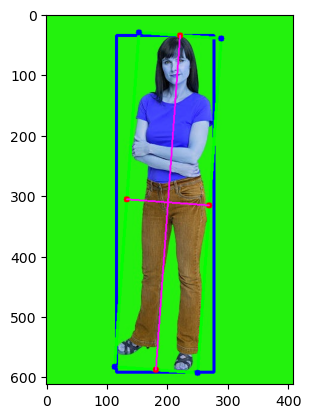

In [29]:
h,w,s,hp = get_Measurement(img, 165)
mask = generate_Mask(img)
imgc, box = get_Sckeleton(img,mask)
plt.imshow(imgc)
print("estimation height : ",h)
print("estimation width : ",w)
print("estimation shoulder-width : ",s)
print("estimation hip-width : ", hp)

In [30]:
df = pd.read_csv('./dataset/normalized_dataset.csv')

In [31]:
output_data = df['Size'].values

In [33]:
model = tf.keras.models.load_model('model.h5')
label_encoder = LabelEncoder()
output_daat = label_encoder.fit_transform(output_data)

In [34]:
def pred_size(data):
    data = np.array(data)
    data = np.reshape(data, (1, data.shape[0]))
    pred = model.predict(data)
    predicted_labels = np.argmax(pred, axis=1)
    predicted_sizes = label_encoder.inverse_transform(predicted_labels)
    return predicted_sizes

In [35]:
# input_data = df[['Age', 'ShoulderWidth', 'Hips', 'TotalHeight']].values
input_data = [20, s, hp, h]
print(pred_size(input_data))

1/1 [==============================] - 0s 79ms/step
['XL']
